#회귀
입력에 대해 연속적인 값을 대응시키는 문제

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
np.random.seed(seed=1)
X_min = 4 # 하한
X_max = 30 # 상한
X_n = 16 # 인원수
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2] # 생성 매개 변수
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] *X) + 4 *np.random.randn(X_n)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max = X_max, X_n= X_n, T=T)

In [ ]:
print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [ ]:
print(np.round(X, 2)) # 소수점 이하 몇 자리를 나타낼지

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [ ]:
print(np.round(T, 2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


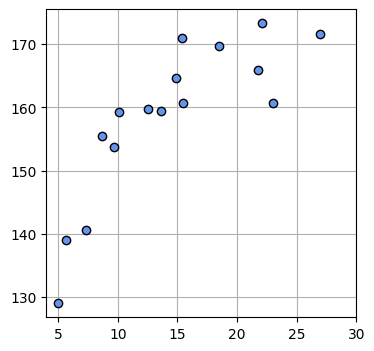

In [ ]:
plt.figure(figsize=(4, 4))
plt.plot(X, T, marker='o', linestyle='None', markeredgecolor="black", color="cornflowerblue")
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

제곱 오차 함수

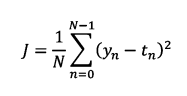

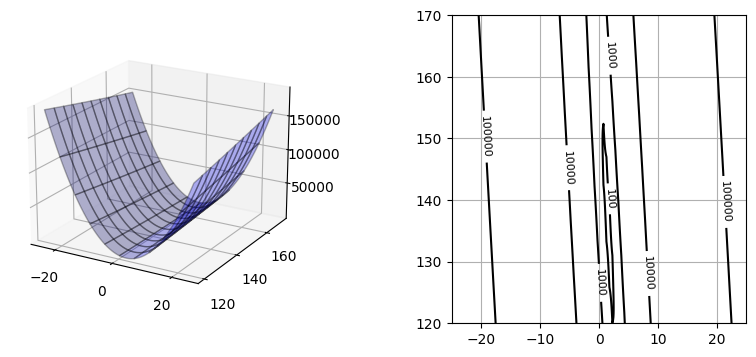

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 평균 오차 함수
def mse_line(x, t, w):
  y = w[0] * x + w[1]
  mse = np.mean((y - t)**2)
  return mse

# 계산
xn = 100
w0_range = [-25, 25] # 직선의 기울기 범위
w1_range = [120, 170] # 직선의 절편 범위
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))

for i0 in range(xn):
  for i1 in range(xn):
    J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J ,rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1,2,2)
cont = plt.contour(xx0, xx1, J, 30, colors='black', levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize= 8)
plt.grid(True)
plt.show()

위의 그래프에서 w0 = 3, w1 = 135 근처에서 J의 최솟값


In [ ]:
# 평균 제곱 오차의 기울기
def dmse_line(x, t, w):
  y = w[0] * x + w[1]
  d_w0 = 2 * np.mean((y - t) * x )
  d_w1 = 2 * np.mean(y - t)
  return d_w0, d_w1

In [ ]:
# Ex ) w = [10, 165]의 기울기
d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

[5046.3  301.8]


In [ ]:
# 경사하강법
def fit_line_num(x, t):
  w_init = [10.0, 165.0] # 초기 매개 변수
  alpha = 0.001 # 학습률
  i_max = 100000 # 반복의 최대 수
  eps = 0.1 # 종료 기울기의 절대값의 한계
  w_i = np.zeros([i_max, 2])
  w_i[0, :] = w_init
  for i in range(1, i_max):
    dmse = dmse_line(x, t, w_i[i-1])
    w_i[i, 0] = w_i[i-1, 0] - alpha * dmse[0]
    w_i[i, 1] = w_i[i-1, 1] - alpha * dmse[1]
    if max(np.absolute(dmse)) < eps: # 종료판정, np.absolute는 절대값
      break
  w0 = w_i[i, 0]
  w1 = w_i[i, 1]
  w_i = w_i[:i, :]
  return w0, w1, dmse, w_i

반복횟수 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


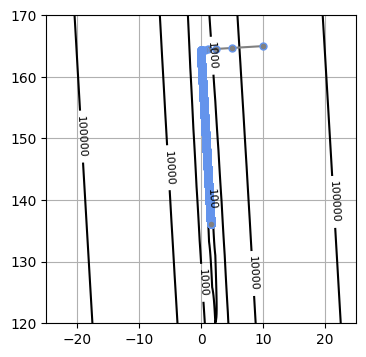

In [ ]:
plt.figure(figsize = (4, 4)) # MSE의 등고선 표시
xn = 100 # 등고선 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
  for i1 in range(xn):
    J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors='black', levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize= 8)
plt.grid(True)

# 경사 하강법 호출
W0, W1, dMSE, W_history = fit_line_num(X, T)

# 결과보기
print('반복횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()


# 경사 하강법에 의한 직선 모델의 피팅 결과

In [ ]:
def show_line(w):
  xb = np.linspace(X_min, X_max, 100)
  y =w[0] * xb +  w[1]
  plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)

W=[1.540, 136.176]
SD=7.002


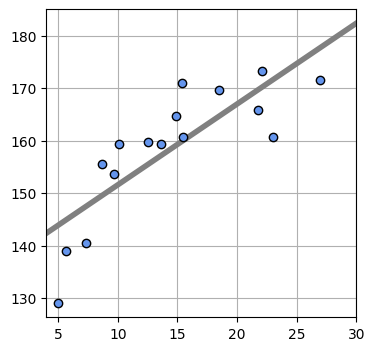

In [ ]:
plt.figure(figsize=(4, 4))
W= np.array([W0, W1])
mse = mse_line(X, T, W)
print('W=[{0:.3f}, {1:.3f}]'.format(W0, W1))
print('SD={0:.3f}'.format(np.sqrt(mse)))
show_line(W)
plt.plot(X, T, marker='o', linestyle = 'None',
         markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

J가 복잡한 모양이라면 최솟값 구하는게 어렵지만, 여기에서는 w0과 w1의 2차 함수로 되어있어 함몰형이 됨이 보증됨

- 수치해 : 경사 하강법을 이용한 반복 계산을 통해 근사값을 구하는 수치 계산법
- 해석해 : 직선 모델에서 방정식을 해결하여 구할 수 있는 정확한 해


해석해로 구하기
-> 경사 하강법과 거의 같은 결과

W=[1.540, 136.176]
SD=7.001


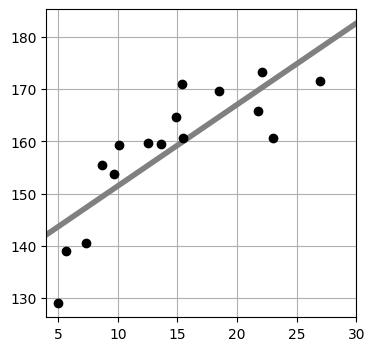

In [ ]:
# 해석해
def fit_line(x, t):
  mx = np.mean(x)
  mt = np.mean(t)
  mtx = np.mean(t * x)
  mxx = np.mean(x * x)
  w0 = (mtx - mt * mx) / (mxx - mx**2)
  w1 = mt - w0 * mx
  return np.array([w0, w1])

W = fit_line(X, T)
print('W=[{0:.3f}, {1:.3f}]'.format(W0, W1))
mse = mse_line(X, T, W)
print('SD={0:.3f}'.format(np.sqrt(mse)))
plt.figure(figsize=(4, 4))
show_line(W)
plt.plot(X, T, marker='o', linestyle = 'None',
         markeredgecolor='black', color='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

### 입력이 2차원인 경우

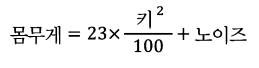

In [ ]:
# 2차원 데이터 생성
X0 = X # 나이 데이터
X0_min = 5
X0_max = 30
np.random.seed(seed=1)
X1 = 23 * (T / 100)**2 + 2 * np.random.randn(X_n) # 몸무게 데이터
X1_min = 40
X1_max = 75

In [ ]:
print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


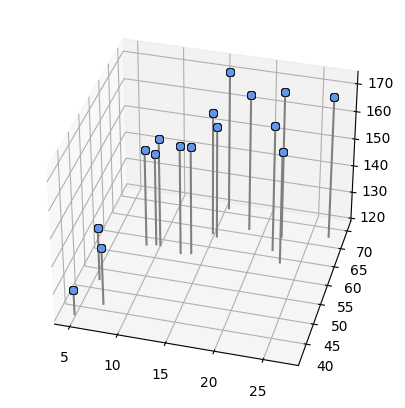

In [ ]:
def show_data2(ax, x0, x1, t):
  for i in range(len(x0)):
    ax.plot([x0[i], x0[i]], [x1[i], x1[i]], [120, t[i]], color='gray')
    ax.plot(x0, x1, t, 'o', color='cornflowerblue', markeredgecolor='black', markersize=6, markeredgewidth=0.5)
    ax.view_init(elev=35, azim = -75)
plt.figure(figsize = (6,5))
ax = plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)
plt.show()

나이가 많아질수록, 몸무게가 증가할수록 키가 커짐

SD=12.876 cm


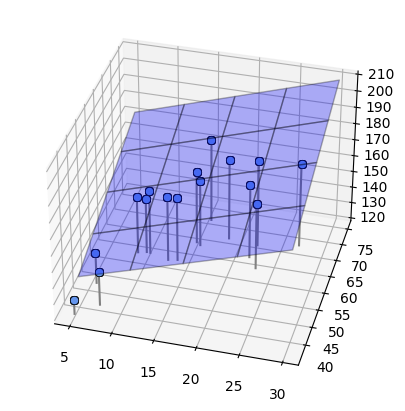

In [ ]:
# 면을 그리는 함수
def show_plane(ax, w):
  px0 = np.linspace(X0_min, X0_max, 5)
  px1 = np.linspace(X1_min, X1_max, 5)
  px0, px1 = np.meshgrid(px0, px1)
  y = w[0]*px0 + w[1] * px1 + w[2]
  ax.plot_surface(px0, px1, y, rstride=1, cstride =1 ,alpha =0.3, color='blue', edgecolor='black')

# 면의 MSE
def mse_plane(x0, x1, t, w):
  y= w[0] * x0 + w[1] * x1 + w[2]
  mse = np.mean((y-t)**2)
  return mse

plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1, projection='3d')
W= [1.5, 1, 90]
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse =mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()

위 그래프의 면의 함수

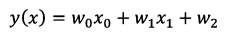

매개 변수의 해석해

w0 =0.5, w1 =1.1, w2 =89.0
SD =2.546 cm


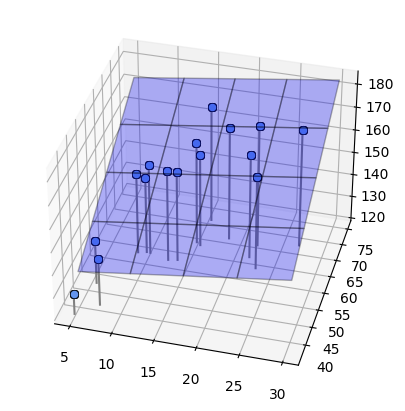

In [ ]:
def fit_plane(x0, x1, t):
  c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
  c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)
  c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)
  v_x0 = np.var(x0)
  v_x1 = np.var(x1)
  w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1**2 - v_x0 * v_x1)
  w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1**2 - v_x0 * v_x1)
  w2 = -w0*np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
  return np.array([w0, w1, w2])

plt.figure(figsize = (6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = fit_plane(X0, X1, T)
print("w0 ={0:.1f}, w1 ={1:.1f}, w2 ={2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD ={0:.3f} cm".format(np.sqrt(mse)))
plt.show()

나이 뿐 만 아니라 몸무게 정보도 추가하니 예측정확도가 증가하여 선 모델일 때의 7cm보다 SD가 2.55cm로 작아짐

##D차원 선형회귀모델

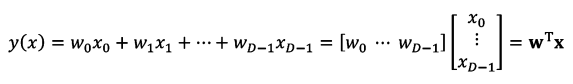

####D차원 선형 회귀 모델의 해(무어-펜로즈 의사 역행렬)
- x가 어떤 차원이라도 모두 최적의 w를 얻을 수 있다.

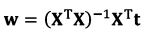

항상 1을 취하는 차원을 입력 데이터 x에 추가하고, 원점에 얽매이지 않는 면을 구할 수 있다.

D차원의 x문제에서도 D+1번째 차원에 1을 얻는 요소 추가하면 자유롭게 움직이는 모델 표현 가능

## 선형 기저 함수 모델

곡선을 사용하여 나타내면 오차가 더 작아짐

기저함수는 여러 세트에서 사용되기 때문에 인덱스를 나타내는 j가 붙어있음

가우스 기저함수 :


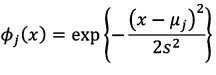

뮤 : 중심위치

s : 확장 정도

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
outfile = np.load('ch5_data.npz')
X= outfile['X']
X_min= outfile['X_min']
X_max= outfile['X_max']
X_n= outfile['X_n']
T= outfile['T']


In [ ]:
# 가우스 함수
def gauss(x, mu, s):
  return np.exp(-(x - mu)**2 / (2 * s**2))

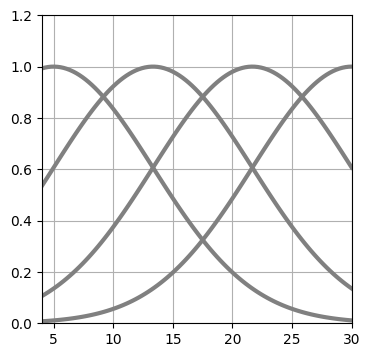

In [ ]:
M = 4 # 4개의 가우스 함수
plt.figure(figsize=(4, 4))
mu = np.linspace(5, 30, M) # 나이의 범위 5~30
s = mu[1] - mu[0] # 인접한 가우스 함수 중심 사이의 거리
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
  y = gauss(xb, mu[j], s)
  plt.plot(xb, y, color='gray', linewidth=3)
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()

선형 기저 함수 모델

w : 가중치 매개 변수

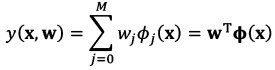

평균 제곱 오차 J

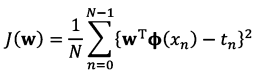

선형 모델의 평균 제곱 오차와 비슷한 모양을 띄고 있음

선형 기저 함수 모델은 입력 x로 해석한 선형 회귀 모델과 같다


In [ ]:
# 선형 기저 함수 모델
def gauss_func(w, x):
  m = len(w) -1
  mu = np.linspace(5, 30, m)
  s = mu[1] - mu[0]
  y = np.zeros_like(x)
  for j in range(m):
    y = y + w[j] * gauss(x, mu[j], s)
  y = y + w[m]
  return y

In [ ]:
# 선형 기저 함수 모델 MSE
def mse_gauss_func(x, t, w):
  y = gauss_func(w, x)
  mse = np.mean((y-t)**2)
  return mse

In [ ]:
# 선형 기저 함수 모델 정확한 해
def fit_gauss_func(x, t, m):
  mu = np.linspace(5, 30 ,m)
  s = mu[1] - mu[0]
  n = x.shape[0]
  psi = np.ones((n, m+1))
  for j in range(m):
    psi[:,j] = gauss(x, mu[j],s)
  psi_T = np.transpose(psi)

  b = np.linalg.inv(psi_T.dot(psi))
  c = b.dot(psi_T)
  w = c.dot(t)
  return w

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98cm


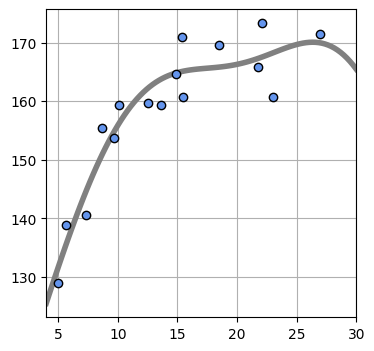

In [ ]:
# 가우스 기저 함수 표시
def show_gauss_func(w):
  xb = np.linspace(X_min, X_max, 100)
  y = gauss_func(w, xb)
  plt.plot(xb, y, c=[.5,.5,.5],lw=4)

plt.figure(figsize=(4, 4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X,T,W)
print('W='+ str(np.round(W,1)))
print('SD={0:.2f}cm'.format(np.sqrt(mse)))
plt.show()

직선 모델 때의 오차 7cm보다 훨씬 줄어듦

###오버피팅의 문제

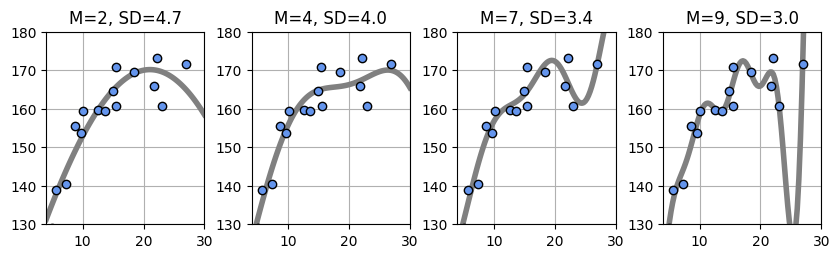

In [ ]:
# M을 2, 4, 7, 9일 경우로 나눠서 피팅
plt.figure(figsize = (10, 2.5))
plt.subplots_adjust(wspace=0.3)
M =[2, 4, 7, 9]
for i in range(len(M)):
  plt.subplot(1, len(M), i +1)
  W =fit_gauss_func(X, T, M[i])
  show_gauss_func(W)
  plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
  plt.xlim(X_min, X_max)
  plt.grid(True)
  plt.ylim(130,180)
  mse = mse_gauss_func(X, T, W)
  plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

M이 늘어나면 오차의 표준편차 SD는 줄어들지만 가우스 기저 함수는 흐물흐물하게 변한다

-> 새로운 입력에 대한 예측이 잘 되지 않음

: 과적합 현상

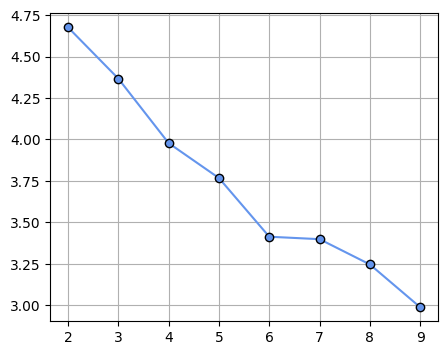

In [ ]:
# 2 ~ 9까지 M 나타내 봄
plt.figure(figsize=(5,4))
M = range(2,10)
mse2 =np.zeros(len(M))
for i in range(len(M)):
  W = fit_gauss_func(X, T, M[i])
  mse2[i] = np.sqrt(mse_gauss_func(X, T, W))
plt.plot(M , mse2, marker='o', color='cornflowerblue', markeredgecolor='black')
plt.grid(True)
plt.show()

최적의 M 찾는 방법

: 데이터 X를 테스트 데이터와 훈련 데이터로 나누기

훈련에 이용하지 않은 미지의 데이터에 대한 예측 오차로 M을 평가한다

-> 홀드 아웃 검증

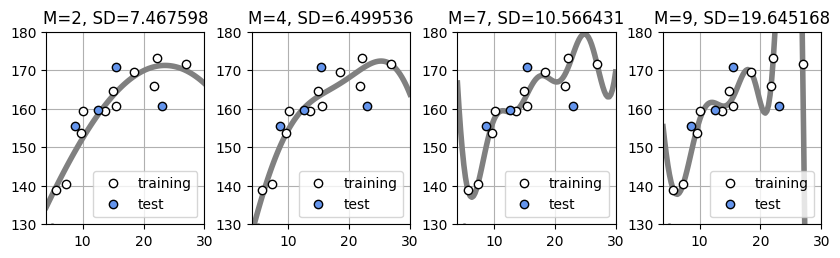

In [ ]:
X_test = X[:int(X_n / 4 + 1)]
T_test = T[:int(X_n / 4 + 1)]
X_train = X[int(X_n / 4 + 1):]
T_train = T[int(X_n / 4 + 1):]

plt.figure(figsize=(10, 2.5))

plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
  plt.subplot(1, len(M), i +1)
  W = fit_gauss_func(X_train, T_train, M[i])
  show_gauss_func(W)
  plt.plot(X_train, T_train, marker='o', linestyle='None', color='white', markeredgecolor='black', label ='training')
  plt.plot(X_test, T_test, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black', label ='test')
  plt.legend(loc='lower right', fontsize=10, numpoints=1)
  plt.xlim(X_min, X_max)
  plt.ylim(130, 180)
  plt.grid(True)
  mse = mse_gauss_func(X_test, T_test, W)
  plt.title("M={0:d}, SD={1:1f}".format(M[i], np.sqrt(mse)))
plt.show()

경향을 정량적으로 보기 위해 M을 2부터 9까지 하나씩 이동하며 오차를 플롯

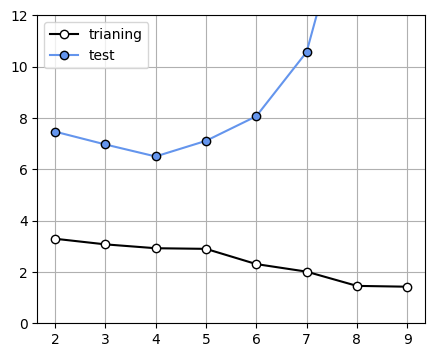

In [43]:
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
plt.plot(M, mse_train, marker="o", linestyle="-", markerfacecolor="white", markeredgecolor="black", color="black", label="trianing")
plt.plot(M, mse_test, marker="o", linestyle="-", color="cornflowerblue", markeredgecolor="black", label="test")
plt.legend(loc="upper left", fontsize=10)
plt.ylim(0, 12)
plt.grid(True)
plt.show()

결과 해석 : M = 5에서 오버피팅이 일어나므로 M = 4의 경우가 가장 데이터에 적합하다

데이터 양이 적다면 분류법에 의해 오차의 변동이 두드러짐

-> 교차검증 사용(K겹 교차 검증)

데이터 X와 t를 K개로 분할한다. 이 중 하나를 테스트 데이터로 삼아 나머지를 훈련 데이터로 한다. 훈련 데이터를 사용해 모델 매개 변수를 최적화하고, 테스트 데이터의 평균 제곱 오차를 계산한다. 테스트 데이터를 바꾸어 이 절차를 K회 반복한다. 마지막으로 K개의 평균 제곱 오차의 평균을 취하여 모델의 평가치로 한다.

In [ ]:
# 데이터를 K분할하여 평균 제곱 오차를 출력하는 함수
def kfold_gauss_func(x, t, m, k):
  n = x.shape[0]
  mse_train = np.zeros(k)
  mse_test = np.zeros(k)
  for i in range(0, k):
    x_train = x[np.fmod(range(n),k) != i] # n을 k로 나눈 나머지를 출력
    t_train = t[np.fmod(range(n),k) != i]
    x_test = x[np.fmod(range(n),k) == i]
    t_test = t[np.fmod(range(n),k) == i]
    wm = fit_gauss_func(x_train, t_train, m)
    mse_train[i] = mse_gauss_func(x_train, t_train, wm)
    mse_test[i] = mse_gauss_func(x_test, t_test, wm)
  return mse_train, mse_test

In [ ]:
np.fmod(range(10),5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [ ]:
M = 4 # 기저의 수
K = 4 # 분할 수
kfold_gauss_func(X, T, M, K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782018,  18.30921743,  47.52459642]))

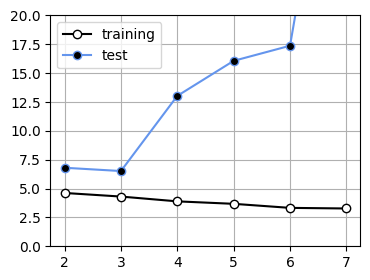

In [ ]:
M = range(2, 8) # 2 ~ 7 M으로 오차의 평균을 계산
K = 16 # 분할 수를 최대 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
  Cv_Gauss_train[: ,i], Cv_Gauss_test[:, i] = kfold_gauss_func(X, T, M[i], K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))
plt.figure(figsize=(4, 3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-', color='k', markerfacecolor='w', label='training')
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-', color='cornflowerblue', markerfacecolor='black', label='test')
plt.legend(loc = 'upper left', fontsize=10)
plt.ylim(0,20)
plt.grid(True)
plt.show()

M = 3일 때 테스트 데이터의 오차가 가장 작음(LOOCV에서)

M = 3을 통해 모델 매개 변수 w구하기

SD=4.37 cm


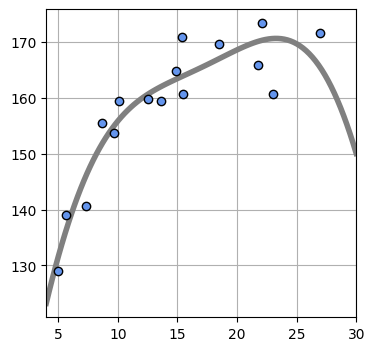

In [ ]:
M = 3 # 최적의 M을 사용
plt.figure(figsize=(4, 4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

데이터 수가 적으면 교차 검증이 유용하나 많으면 계산에 시간이 많이 걸리므로 홀드 아웃 검증 사용하기

데이터 수가 크면 홀드 아웃 검증 결과가 교차 검증과 비슷하게 됨

###새로운 모델의 생성

25세에서 그래프가 급격히 내려간다는 점 보완, 데이터가 충분하지 않았음

-> 지식에 대한 모델 새로 만들기

In [ ]:
def model_A(x, w):
  y = w[0] - w[1] * np.exp(-w[2] * x)
  return y
def show_model_A(w):
  xb = np.linspace(X_min, X_max, 100)
  y = model_A(xb,w)
  plt.plot(xb, y, c=[.5,.5,.5], lw=4)
def mse_model_A(w, x, t):
  y = model_A(x, w)
  mse = np.mean((y-t)**2)
  return mse

In [ ]:
from scipy.optimize import minimize

# 모델 A의 매개 변수의 최적화
def fit_model_A(w_init, x, t):
  # 첫 번째 인수는 최소화할 목표 함수, 두 번째 인수는 w의 초기값
  # 세 번째 인수는목표 함수를 최적화하는 매개변수 w이외의 인수 x, t
  res1 = minimize(mse_model_A, w_init, args=(x, t), method="powell")
  return res1.x

w0=169.0, w1=113.7, w2=0.2
SD=3.86cm


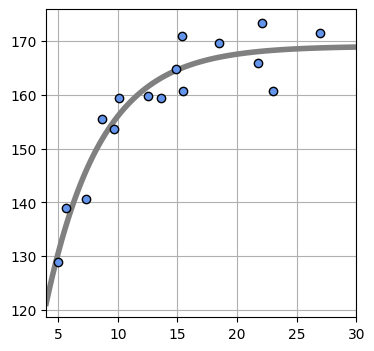

In [ ]:
plt.figure(figsize=(4, 4))
W_init=[100, 0, 0]
W = fit_model_A(W_init, X, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_model_A(W, X, T)
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()

모델의 선택(비교 방법)

홀드 아웃 검증과 교차 검증 모델로 모델의 좋고 나쁨 평가 가능

In [ ]:
def kfold_model_A(x, t, k):
  n = len(x)
  mse_train = np.zeros(k)
  mse_test = np.zeros(k)
  for i in range(0, k):
    x_train = x[np.fmod(range(n), k) != i]
    t_train = t[np.fmod(range(n), k) != i]
    x_test = x[np.fmod(range(n), k) == i]
    t_test = t[np.fmod(range(n), k) == i]
    wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
    mse_train[i] = mse_model_A(wm, x_train, t_train)
    mse_test[i] = mse_model_A(wm, x_test, t_test)
  return mse_train, mse_test

Gauss(M=3) SD=6.51 cm
Model A SD=4.72 cm


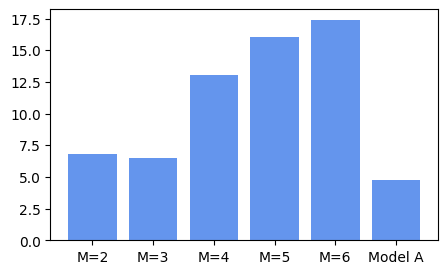

In [44]:
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD={0:.2f} cm".format(mean_Gauss_test[1]))
print("Model A SD={0:.2f} cm".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2", "M=3","M=4","M=5","M=6","Model A"]
plt.figure(figsize= (5,3))
plt.bar(M , SD, tick_label=label, align='center', facecolor='cornflowerblue')
plt.show()

LOOCV 결과, 새로 생각한 모델 A의 테스트 데이터의 오차가 가장 작으므로 가우스 기저 함수보다 데이터에 적합한 모델이다.

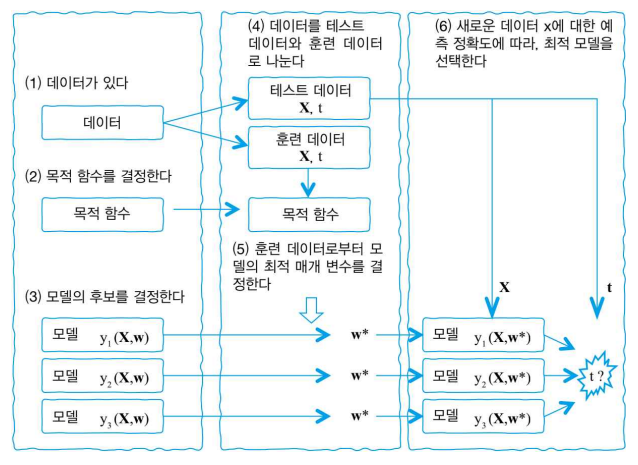